In [1]:
# This is the notebook that I will be working on for the project. This may be subject to change.
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

file1 = '/Users/ChandlerCapps/Desktop/CSC3130/WebProject_Chandler/JSON/OPGG/Daily_All/2017-03-30_All.json'
file2 = '/Users/ChandlerCapps/Desktop/CSC3130/WebProject_Chandler/JSON/OPGG/Daily_All/2017-03-31_All.json'

data1 = pd.read_json(file1)
data2 = pd.read_json(file2)

In [2]:
# 1) I can use this data to look at common stats between characters and how they fit in the "meta" (current gameplay)
# 2) I can look at all of the dates and look at the most common top 5 champions that are the best
# 3) I can also take the rank that they are in and find the true top 5 or 10 instead of just the amount of times they show up
# 4) With the ban and pick rates I can see who is having the most success in their games
# 5) With ban and pick rates I can see who is the most worthy ban/pick due to their win% and other stats

In [3]:
# Sets up 'masterData' to be the count table
# Re-running this will also reset the table
# "masterData": counts the number of times champions show up in the top 10 list from each day
masterData = data1.sort_values("Champion_Name")
masterData.drop(masterData.columns[[1,2,3,4]], axis=1, inplace = True)
masterData.set_index("Champion_Name", True, False, True)
masterData.insert(0, "Count", 0)

In [4]:
# "Function" for pulling in new files and getting the count of how many times a Champion shows up for every day 
# in the "Daily" file section
for m in range(1,13):
    for d in range(1,32):
        # if statements to keep the "0" so the string is correct
        if m >= 10:
            month = str(m)
        else:
            month = '0'+str(m)
        if d >= 10:
            day = str(d)
        else:
            day = '0'+str(d)
        thisFile = '/Users/ChandlerCapps/Desktop/CSC3130/WebProject_Chandler/JSON/OPGG/Daily_All/2017-'+month+'-'+day+'_All.json'
        try:
            df = pd.read_json(thisFile)
        except ValueError:
            continue
        for x in range(0,9):
            champName = df.get_value(x,'Champion_Name')
            masterData.set_value(champName,"Count", masterData.get_value(champName,"Count")+1)

In [7]:
masterData.sort_values('Count',0,False).head(10)

,Count
Champion_Name,
Ivern,20
Ahri,19
Anivia,16
Sona,15
Swain,14
Amumu,14
Kog'Maw,11
Blitzcrank,10
Master Yi,5


In [8]:
# Sets up "rankData" much like masterData
# "rankData": uses the rank of the data to show the true meaning of rank. Not just the # of times
rankData = data1.sort_values("Champion_Name")
rankData.drop(rankData.columns[[1,2,3,4]], axis=1, inplace = True)
rankData.set_index("Champion_Name", True, False, True)
rankData.insert(0, "Count", 0)

In [9]:
# "Function" for pulling in new files and getting the count of how many times a Champion shows up for every day 
# in the "Daily" file section

# Work on this

numbers = [10,9,8,7,6,5,4,3,2,1]

for m in range(1,13):
    for d in range(1,32):
        # if statements to keep the "0" so the string is correct
        if m >= 10:
            month = str(m)
        else:
            month = '0'+str(m)
        if d >= 10:
            day = str(d)
        else:
            day = '0'+str(d)
        rankFile = '/Users/ChandlerCapps/Desktop/CSC3130/WebProject_Chandler/JSON/OPGG/Daily_All/2017-'+month+'-'+day+'_All.json'
        try:
            df = pd.read_json(rankFile)
        except ValueError:
            continue
        for x in range(0,9):
            champName = df.get_value(x,'Champion_Name')
            rankData.set_value(champName,"Count", rankData.get_value(champName,"Count")+numbers[x])

In [12]:
rankData.sort_values('Count',0,False).head(10)

,Count
Champion_Name,
Ivern,178
Amumu,131
Ahri,129
Sona,97
Anivia,92
Swain,81
Blitzcrank,55
Kog'Maw,52
Shaco,43


In [13]:
# Sets up "rankData" much like masterData
# "rankData": uses the rank of the data to show the true meaning of rank. Not just the # of times
bronzeData = data1.sort_values("Champion_Name")
bronzeData.drop(bronzeData.columns[[1,2,3,4]], axis=1, inplace = True)
bronzeData.set_index("Champion_Name", True, False, True)
bronzeData.insert(0, "Count", 0)

In [14]:
# "Function" for pulling in new files and getting the count of how many times a Champion shows up for every day 
# in the "Daily" file section

# I can do this for any league ranking I would wany by changing one or two things

numbers = [10,9,8,7,6,5,4,3,2,1]

for m in range(1,13):
    for d in range(1,32):
        # if statements to keep the "0" so the string is correct
        if m >= 10:
            month = str(m)
        else:
            month = '0'+str(m)
        if d >= 10:
            day = str(d)
        else:
            day = '0'+str(d)
        bronzeFile = '/Users/ChandlerCapps/Desktop/CSC3130/WebProject_Chandler/JSON/OPGG/Daily_All/2017-'+month+'-'+day+'_1Bronze.json'
        try:
            df = pd.read_json(bronzeFile)
        except ValueError:
            continue
        for x in range(0,9):
            champName = df.get_value(x,'Champion_Name')
            bronzeData.set_value(champName,"Count", bronzeData.get_value(champName,"Count")+numbers[x])

In [15]:
bronzeData.sort_values('Count',0,False).head(10)

,Count
Champion_Name,
Amumu,153
Sion,80
Sona,74
Zac,72
Yorick,68
Swain,65
Brand,59
Xin Zhao,53
Anivia,41


,Champion_Name,Count
0,Amumu,153
1,Sion,80
2,Sona,74
3,Zac,72
4,Yorick,68
5,Swain,65
6,Brand,59
7,Xin Zhao,53
8,Anivia,41
9,Master Yi,39


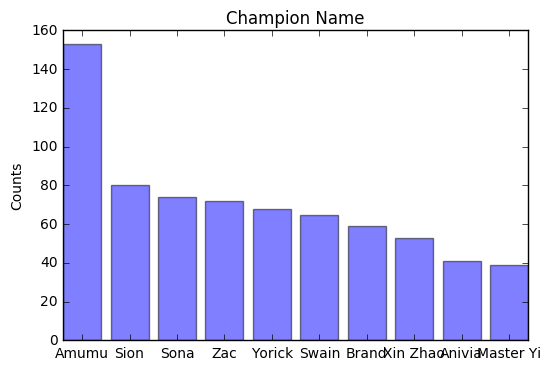

In [20]:
#Graph shows the top 10 list and their "true" values

#puts the original index back in and sorts them
holder = bronzeData
holder = holder.sort_values('Count',0,False).head(10).reset_index(drop = False)
bronzeChampList = []
bronzeValues = []
for x in range(0,10):
    bronzeChampList.append(holder.get_value(x,"Champion_Name"))
    bronzeValues.append(holder.get_value(x,"Count"))

objects = (bronzeChampList)
# y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Champion Name')
# fig = plt.figure(figsize=(15,7))

plt.bar(y_pos, bronzeValues, align='center',alpha=0.5)
holder.sort_values('Count',0,False).head(10)

In [27]:
# To get a certains champs daily listings in a graph
dates = []
values = []
name = 'Amumu'

for m in range(1,13):
    for d in range(1,32):
        # if statements to keep the "0" so the string is correct
        if m >= 10:
            month = str(m)
        else:
            month = '0'+str(m)
        if d >= 10:
            day = str(d)
        else:
            day = '0'+str(d)
        thisFile = '/Users/ChandlerCapps/Desktop/CSC3130/WebProject_Chandler/JSON/OPGG/Daily_All/2017-'+month+'-'+day+'_All.json'
        try:
            df = pd.read_json(thisFile)
        except ValueError:
            continue
        df.set_index("Champion_Name", True, False, True)
        values.append(134 - df.get_value(name, "Champion_Rank"))
        dates.append(df.get_value(name, "Date_Scraped"))

['2017-03-30',
 '2017-03-31',
 '2017-04-02',
 '2017-04-04',
 '2017-04-05',
 '2017-04-06',
 '2017-04-07',
 '2017-04-08',
 '2017-04-09',
 '2017-04-10',
 '2017-04-11',
 '2017-04-12',
 '2017-04-13',
 '2017-04-14',
 '2017-04-16',
 '2017-04-17',
 '2017-04-18',
 '2017-04-19',
 '2017-04-20',
 '2017-04-21']

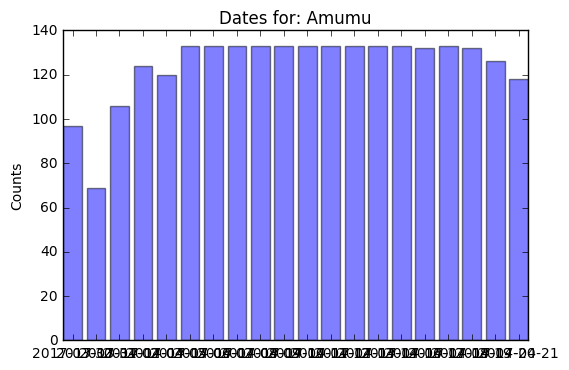

In [28]:
objects = (dates)
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Dates for: '+ name)

plt.bar(y_pos, values, align='center',alpha=0.5)
dates